In [1]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
import sklearn as sk
from matplotlib import pyplot as plt

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype= np.short) #gives 1 for females and 0 for males

input_variables = [None]*43

for i in range(43):

    atlas_nii = index_img(crad['scorr_mean'], i); #this needs to be modified for some tasks
    masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True);
    input_variables[i] = masker.fit_transform(brain_data.gray_matter_maps);

dims = np.zeros(43)
for i in range(43):
    dims[i] = input_variables[i].shape[1]


C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\struct.py:850: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\atlas.py:269: FutureWarning: The default behavior of the function will be deprecated and replaced in release 0.13 to use the new parameters homogeneity and grp_mean.
  warnings.warn(
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\joblib\memory.py:353: FutureWarning: The d

In [2]:
#TASK 6

EIGHTY = round(output_variable.size*0.8)
accuracies = [None]*43


for i in range(43):
    model = sk.linear_model.LogisticRegression().fit(input_variables[i][:EIGHTY],output_variable[:EIGHTY] )

    prediction = model.predict(input_variables[i][EIGHTY:])
    accuracies[i] = sum(prediction == output_variable[EIGHTY:])/output_variable[EIGHTY:].size
    accuracies[i] = round(accuracies[i]*100,2)

del model
del prediction

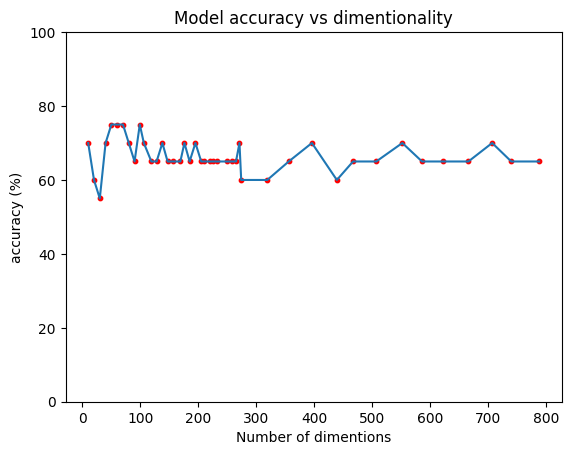

In [3]:
plt.plot(dims,accuracies);
plt.scatter(dims,accuracies,10,'r');
plt.ylim([0,100]);
plt.title('Model accuracy vs dimentionality');
plt.xlabel('Number of dimentions');
plt.ylabel('accuracy (%)');

In [4]:
#TASK 7

EIGHTY = round(output_variable.size*0.8)
accuracies = [None]*25

for i in range(0,25):
    pcadata = sk.decomposition.PCA(n_components=i+1).fit_transform(input_variables[-1])

    model = sk.linear_model.LogisticRegression().fit(pcadata[:EIGHTY],output_variable[:EIGHTY] )

    prediction = model.predict(pcadata[EIGHTY:])
    accuracies[i] = sum(prediction == output_variable[EIGHTY:])/output_variable[EIGHTY:].size
    accuracies[i] = round(accuracies[i]*100,2)

del pcadata
del model
del prediction

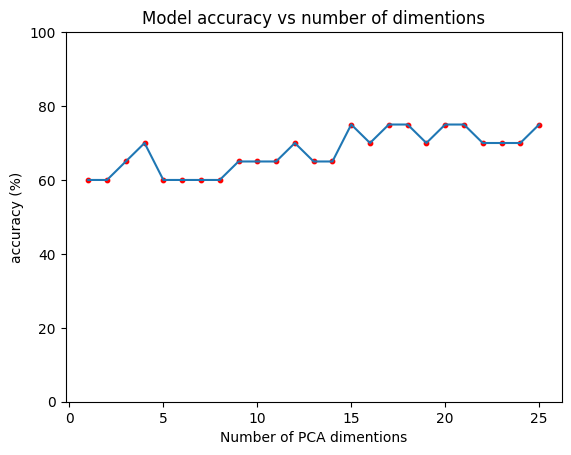

In [5]:
plt.plot(range(1,26),accuracies);
plt.scatter(range(1,26),accuracies,10,'r');
plt.ylim([0,100]);
plt.title('Model accuracy vs number of dimentions');
plt.xlabel('Number of PCA dimentions');
plt.ylabel('accuracy (%)');

In [6]:
#TASK 8

EIGHTY = round(output_variable.size*0.8)
accuracies = [None]*25

for i in range(0,25):
    kmeans = sk.cluster.KMeans(n_clusters=i+1,n_init="auto").fit_transform(input_variables[-1])

    model = sk.linear_model.LogisticRegression(max_iter= 10000).fit(kmeans[:EIGHTY],output_variable[:EIGHTY] )

    prediction = model.predict(kmeans[EIGHTY:])
    accuracies[i] = sum(prediction == output_variable[EIGHTY:])/output_variable[EIGHTY:].size
    accuracies[i] = round(accuracies[i]*100,2)
    
del kmeans
del model
del prediction

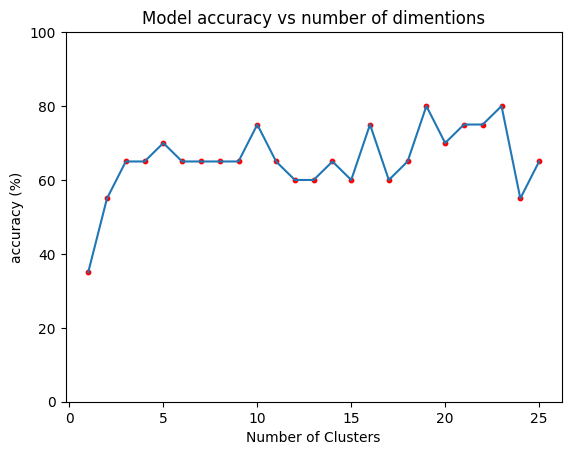

In [7]:
plt.plot(range(1,26),accuracies);
plt.scatter(range(1,26),accuracies,10,'r');
plt.ylim([0,100]);
plt.title('Model accuracy vs number of dimentions');
plt.xlabel('Number of Clusters');
plt.ylabel('accuracy (%)');

In [8]:
#TASK 9

EIGHTY = round(output_variable.size*0.8)
accuracies = [None]*5

for i in range(0,5):
    Kbest = sk.feature_selection.SelectKBest(k=2*(i+1)).fit_transform(input_variables[-1],output_variable)

    model = sk.linear_model.LogisticRegression(max_iter= 10000).fit(Kbest[:EIGHTY],output_variable[:EIGHTY] )

    prediction = model.predict(Kbest[EIGHTY:])
    accuracies[i] = sum(prediction == output_variable[EIGHTY:])/output_variable[EIGHTY:].size
    accuracies[i] = round(accuracies[i]*100,2)

del Kbest
del model
del prediction

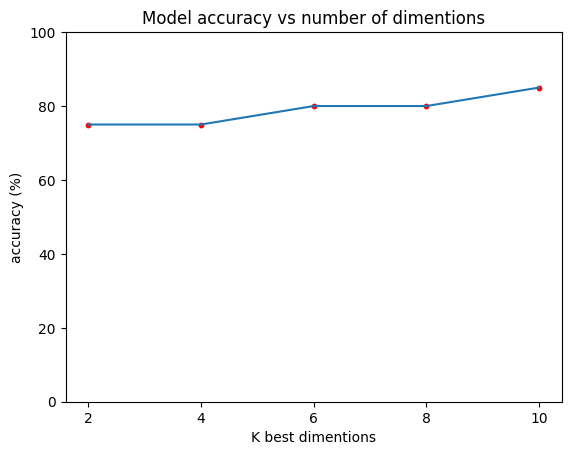

In [9]:
plt.plot(range(2,12,2),accuracies);
plt.scatter(range(2,12,2),accuracies,10,'r');
plt.ylim([0,100]);
plt.xticks(np.arange(2,12,2))
plt.title('Model accuracy vs number of dimentions');
plt.xlabel('K best dimentions');
plt.ylabel('accuracy (%)');

In [10]:
#TASK 10

size = output_variable.size

EIGHTY = round(size*0.8)

models = [None]*43
probabilities = np.zeros((size ,43))

for i in range(0,43):
    models[i] = sk.linear_model.LogisticRegression().fit(input_variables[i][:EIGHTY],output_variable[:EIGHTY])

    probabilities[:,i] = models[i].predict(input_variables[i])


stacked_model = sk.linear_model.LogisticRegression().fit(probabilities[:EIGHTY],output_variable[:EIGHTY])

accuracy = sum(stacked_model.predict(probabilities[EIGHTY:])==output_variable[EIGHTY:])/(size-EIGHTY)
accuracy = round(accuracy*100,2)

print('Accuracy for stacked model is '+str(accuracy)+'%')

Accuracy for stacked model is 65.0%
